### Build A Basic Chatbot With Langgraph(GRAPH API)

In [1]:
from langchain_groq import ChatGroq
from langchain.chat_models import init_chat_model 
from typing import Annotated
from typing_extensions import TypedDict 
from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import add_messages

In [2]:
import os 
from dotenv import load_dotenv 
load_dotenv()

True

In [3]:
llm= ChatGroq(model="llama3-8b-8192")

In [4]:
llm

ChatGroq(client=<groq.resources.chat.completions.Completions object at 0x000001D929469160>, async_client=<groq.resources.chat.completions.AsyncCompletions object at 0x000001D929469A90>, model_name='llama3-8b-8192', model_kwargs={}, groq_api_key=SecretStr('**********'))

In [5]:
llm= init_chat_model("groq:llama3-8b-8192")

In [6]:
llm

ChatGroq(client=<groq.resources.chat.completions.Completions object at 0x000001D92958DBD0>, async_client=<groq.resources.chat.completions.AsyncCompletions object at 0x000001D92958E5D0>, model_name='llama3-8b-8192', model_kwargs={}, groq_api_key=SecretStr('**********'))

In [7]:
# Define State

class State(TypedDict):
    """ 
    # Messages have the type "list". The `add_messages` function
    # in the annotation defines how this state key should be updated
    # (in this case, it appends messages to the list, rather than overwriting them)
    """
    messages: Annotated[list, add_messages]

In [8]:
# Node Functionality
def chatbot(state: State):
    # messages= state["messages"]
    # response= llm.invoke(messages)
    # return {"messages": [response]}

    return {"messages": [llm.invoke(state["messages"])]}

In [9]:
# Initialize the State Graph
graph_builder= StateGraph(State)

# Adding node
graph_builder.add_node("llmchatbot", chatbot)
graph_builder.add_edge(START, "llmchatbot")
graph_builder.add_edge("llmchatbot", END)

# compile the graph
graph= graph_builder.compile()

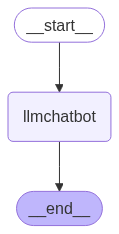

In [10]:
# Visualize the graph
from IPython.display import Image, display

try:
    display(Image(graph.get_graph(xray=True).draw_mermaid_png()))
except Exception as ex:
    pass 

In [11]:
graph.invoke({"messages": ["Hi"]})

{'messages': [HumanMessage(content='Hi', additional_kwargs={}, response_metadata={}, id='4f80d86a-cd74-49bc-8318-ce414793e331'),
  AIMessage(content="Hi! It's nice to meet you. Is there something I can help you with or would you like to chat?", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 25, 'prompt_tokens': 11, 'total_tokens': 36, 'completion_time': 0.098108201, 'prompt_time': 0.017385075, 'queue_time': 0.35631068499999996, 'total_time': 0.115493276}, 'model_name': 'llama3-8b-8192', 'system_fingerprint': 'fp_24ec19897b', 'finish_reason': 'stop', 'logprobs': None}, id='run--4c06a267-fc9c-496f-bb35-5da5b11117c6-0', usage_metadata={'input_tokens': 11, 'output_tokens': 25, 'total_tokens': 36})]}

In [12]:
response= graph.invoke({"messages": ["What is Agentic AI?"]})
# Print Last Messages
response["messages"][-1]

AIMessage(content='Agentic AI refers to a type of artificial intelligence (AI) that is designed to exhibit human-like intelligence and behavior, particularly in terms of its ability to take intentional actions and make decisions autonomously. In other words, agentic AI is designed to be proactive, goal-oriented, and able to adapt to changing situations, much like humans.\n\nThe term "agent" in this context is inspired by the concept of agency in philosophy, which refers to the ability of an entity to act intentionally and make decisions that affect its environment. In the context of AI, an agentic AI system is one that is capable of:\n\n1. Perception: It can perceive its environment, including its own state and the state of its surroundings.\n2. Goal-setting: It can set goals for itself and prioritize them based on its own values and preferences.\n3. Planning: It can plan and reason about the best course of action to achieve its goals.\n4. Execution: It can execute its plans and take i

In [13]:
# Print First Messages
response["messages"][0]

HumanMessage(content='What is Agentic AI?', additional_kwargs={}, response_metadata={}, id='53c09a03-1ddf-462e-a561-67f918b2564b')

In [14]:
# User's Question
print(response["messages"][0].content)

What is Agentic AI?


In [16]:
# LLM's response
print(response["messages"][-1].content)

Agentic AI refers to a type of artificial intelligence (AI) that is designed to exhibit human-like intelligence and behavior, particularly in terms of its ability to take intentional actions and make decisions autonomously. In other words, agentic AI is designed to be proactive, goal-oriented, and able to adapt to changing situations, much like humans.

The term "agent" in this context is inspired by the concept of agency in philosophy, which refers to the ability of an entity to act intentionally and make decisions that affect its environment. In the context of AI, an agentic AI system is one that is capable of:

1. Perception: It can perceive its environment, including its own state and the state of its surroundings.
2. Goal-setting: It can set goals for itself and prioritize them based on its own values and preferences.
3. Planning: It can plan and reason about the best course of action to achieve its goals.
4. Execution: It can execute its plans and take intentional actions to achi

In [17]:
for event in graph.stream({"messages": "Hi How are you?"}):
    for value in event.values():
        print(value["messages"][-1].content)

I'm just a language model, I don't have emotions or feelings like humans do, but I'm functioning properly and ready to help with any questions or tasks you may have! It's great to interact with you. Is there something specific you'd like to talk about or ask?


### Chatbot With Tool

In [2]:
from langchain_tavily import TavilySearch

tool= TavilySearch(max_results=2)
tool.invoke("What is Agentic AI?")

{'query': 'What is Agentic AI?',
 'follow_up_questions': None,
 'answer': None,
 'images': [],
 'results': [{'title': 'What Is Agentic AI? - IBM',
   'url': 'https://www.ibm.com/think/topics/agentic-ai',
   'content': 'What Is Agentic AI? What is agentic AI? What is agentic AI? While generative models focus on creating content based on learned patterns, agentic AI extends this capability by applying generative outputs toward specific goals. A generative AI model like OpenAI’s ChatGPT might produce text, images or code, but an agentic AI system can use that generated content to complete complex tasks autonomously by calling external tools. What are the advantages of agentic AI? How agentic AI works AI orchestration is the coordination and management of systems and agents. Examples of agentic AI Challenges for agentic AI systems Agentic AI systems have massive potential for the enterprise. Many agentic AI systems use reinforcement learning, which involves maximizing a reward function.',


In [ ]:
print("Hi")

Hello
